In [1]:
!pip install yfinance

In [2]:
import sys, os
from google.colab import drive
drive.mount('/content/drive')
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

Mounted at /content/drive


In [3]:
symbol = "^TYX"
data = yf.download(symbol, start="1998-01-01", end="2024-01-01", interval="1d")
data.to_csv('Treasury_Bond_Yield_30Y.csv')
yield_day = pd.read_csv('./Treasury_Bond_Yield_30Y.csv')

[*********************100%***********************]  1 of 1 completed


In [4]:
yield_day.head(10)

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,^TYX,^TYX,^TYX,^TYX,^TYX,^TYX
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,1998-01-02 00:00:00+00:00,5.8480000495910645,5.8480000495910645,5.921999931335449,5.8379998207092285,5.920000076293945,0
3,1998-01-05 00:00:00+00:00,5.729000091552734,5.729000091552734,5.789999961853027,5.724999904632568,5.788000106811523,0
4,1998-01-06 00:00:00+00:00,5.7179999351501465,5.7179999351501465,5.770999908447266,5.714000225067139,5.7230000495910645,0
5,1998-01-07 00:00:00+00:00,5.793000221252441,5.793000221252441,5.801000118255615,5.7270002365112305,5.742000102996826,0
6,1998-01-08 00:00:00+00:00,5.745999813079834,5.745999813079834,5.757999897003174,5.711999893188477,5.738999843597412,0
7,1998-01-09 00:00:00+00:00,5.703999996185303,5.703999996185303,5.791999816894531,5.698999881744385,5.751999855041504,0
8,1998-01-12 00:00:00+00:00,5.695000171661377,5.695000171661377,5.7220001220703125,5.6620001792907715,5.690999984741211,0
9,1998-01-13 00:00:00+00:00,5.703999996185303,5.703999996185303,5.71999979019165,5.690999984741211,5.705999851226807,0


In [5]:
yield_day = yield_day.rename(columns={'Price': 'Date'})
yield_day = yield_day.drop(yield_day.index[[0,1]]) #elimina por posición no por indice
yield_day.reset_index(drop=True, inplace=True)
yield_day.head(10)
print(yield_day.columns)

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [6]:
yield_day.set_index('Date', inplace=True)
yield_day['Close'] = pd.to_numeric(yield_day['Close'])
yield_day['Close'] = yield_day['Close'].interpolate()
yield_day['Close'].head(10)

,Close
Date,
1998-01-02 00:00:00+00:00,5.848
1998-01-05 00:00:00+00:00,5.729
1998-01-06 00:00:00+00:00,5.718
1998-01-07 00:00:00+00:00,5.793
1998-01-08 00:00:00+00:00,5.746
1998-01-09 00:00:00+00:00,5.704
1998-01-12 00:00:00+00:00,5.695
1998-01-13 00:00:00+00:00,5.704
1998-01-14 00:00:00+00:00,5.731


In [7]:
yield_day.index = pd.to_datetime(yield_day.index).tz_convert(None)
print(yield_day.index)

DatetimeIndex(['1998-01-02', '1998-01-05', '1998-01-06', '1998-01-07',
               '1998-01-08', '1998-01-09', '1998-01-12', '1998-01-13',
               '1998-01-14', '1998-01-15',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=6531, freq=None)


In [8]:
start_date = "1998-01-01"
yield_day = yield_day.loc[start_date:]
yield_day['Close'].head(10)

,Close
Date,
1998-01-02,5.848
1998-01-05,5.729
1998-01-06,5.718
1998-01-07,5.793
1998-01-08,5.746
1998-01-09,5.704
1998-01-12,5.695
1998-01-13,5.704
1998-01-14,5.731


In [9]:
print('\nUnique dates in our data: ', len(yield_day.index.unique()), 'Days')
our_date_range = yield_day.index.max() - yield_day.index.min()
print('Total days in our date range:', our_date_range.days, 'Days')
new_index = pd.date_range(yield_day.index.min(), yield_day.index.max())
print(new_index)


Unique dates in our data:  6531 Days
Total days in our date range: 9492 Days
DatetimeIndex(['1998-01-02', '1998-01-03', '1998-01-04', '1998-01-05',
               '1998-01-06', '1998-01-07', '1998-01-08', '1998-01-09',
               '1998-01-10', '1998-01-11',
               ...
               '2023-12-20', '2023-12-21', '2023-12-22', '2023-12-23',
               '2023-12-24', '2023-12-25', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', length=9493, freq='D')


In [10]:
yield_day_new = yield_day.reindex(new_index, fill_value=0)
yield_day_new['Close'].head(10)

,Close
1998-01-02,5.848
1998-01-03,0.000
1998-01-04,0.000
1998-01-05,5.729
1998-01-06,5.718
1998-01-07,5.793
1998-01-08,5.746
1998-01-09,5.704
1998-01-10,0.000
1998-01-11,0.000


<Axes: >

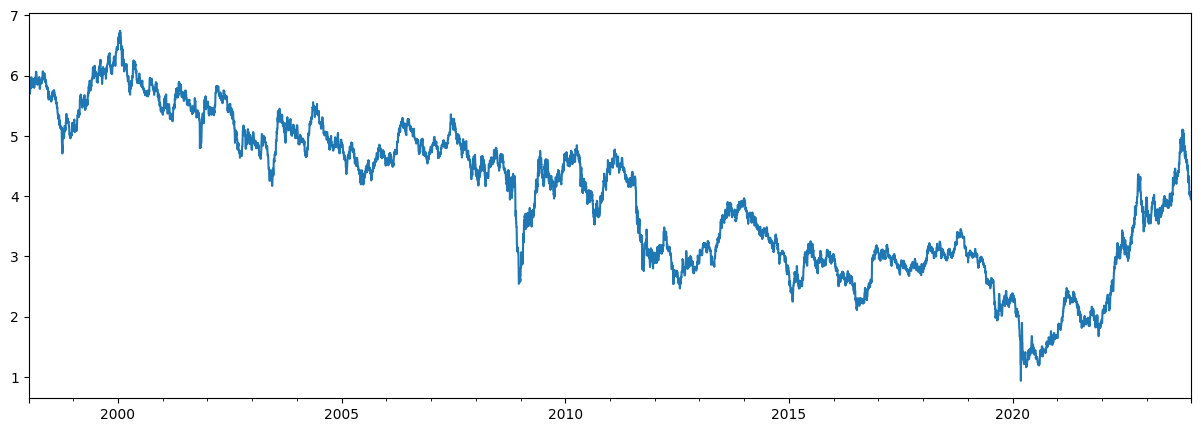

In [11]:
yield_day_new = yield_day.reindex(new_index).ffill()
plt.figure(figsize=(15,5))
yield_day_new['Close'].plot()

In [12]:
print('\nUnique dates in our data: ', len(yield_day_new.index.unique()), 'Days')
our_date_range = yield_day_new.index.max() - yield_day_new.index.min()
print('Total days in our date range:', our_date_range.days, 'Days')
yield_day_new.shape
yield_day_new.head()


Unique dates in our data:  9493 Days
Total days in our date range: 9492 Days


,Adj Close,Close,High,Low,Open,Volume
1998-01-02,5.8480000495910645,5.848,5.921999931335449,5.8379998207092285,5.920000076293945,0
1998-01-03,5.8480000495910645,5.848,5.921999931335449,5.8379998207092285,5.920000076293945,0
1998-01-04,5.8480000495910645,5.848,5.921999931335449,5.8379998207092285,5.920000076293945,0
1998-01-05,5.729000091552734,5.729,5.789999961853027,5.724999904632568,5.788000106811523,0
1998-01-06,5.7179999351501465,5.718,5.770999908447266,5.714000225067139,5.7230000495910645,0


**Extracting Time Series Components**

In [13]:
import seaborn as sns

In [14]:
yield_day_close = yield_day_new[['Close']]
yield_day_close.head()

,Close
1998-01-02,5.848
1998-01-03,5.848
1998-01-04,5.848
1998-01-05,5.729
1998-01-06,5.718


In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
ss_decomposition = seasonal_decompose(x=yield_day_close, model='multiplicative', period=12)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

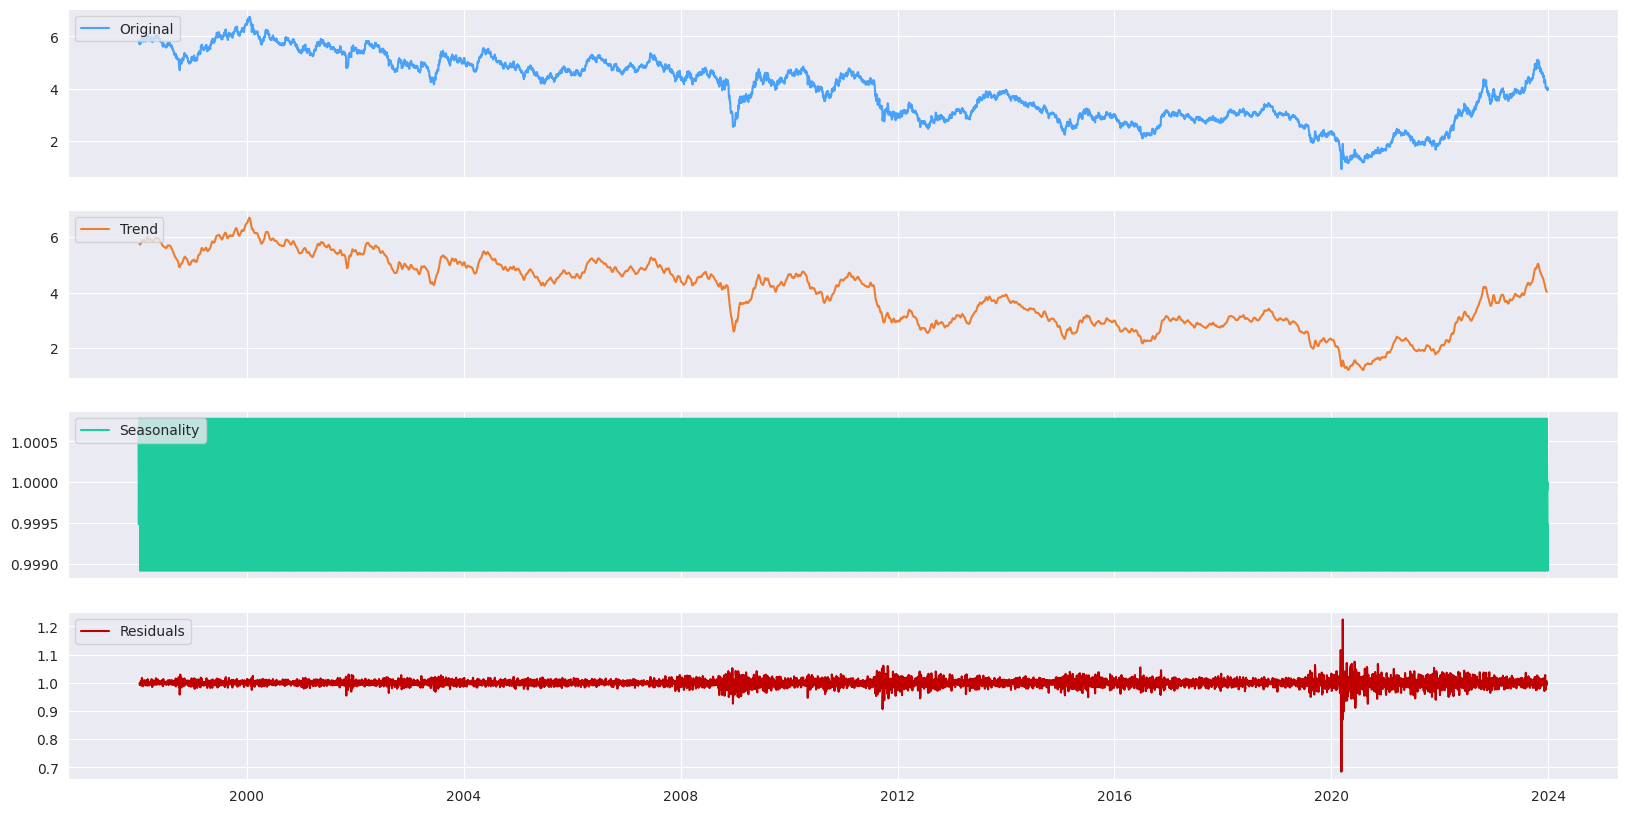

In [16]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(20,10))

axes[0].plot(yield_day_close, label='Original', c="#48A1FA")
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend', c="#ED7D31")
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality', c="#1FCC9E")
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals', c="#C00000")
axes[3].legend(loc='upper left');

**Checking for Stationary, White Noise, Random Walk**

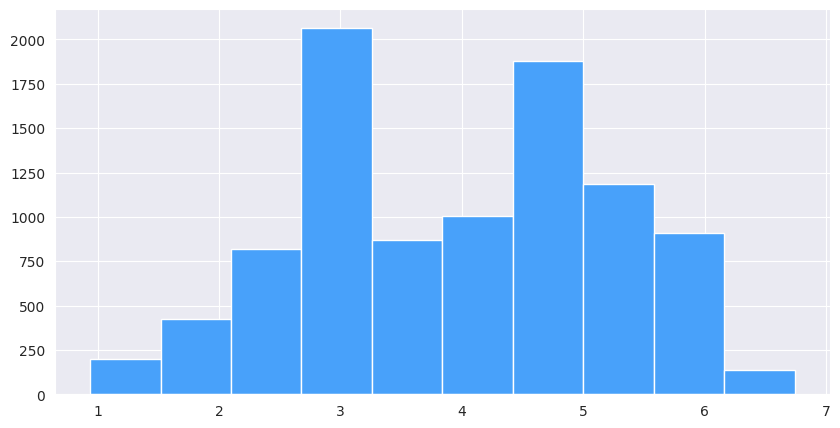

In [17]:
pd.Series(yield_day_close['Close']).hist(color='#48A1FA', figsize=(10,5));

In [18]:
import numpy as np

In [19]:
len(yield_day_close)

9493

In [20]:
# splitting the time series into 15 equaled chunks
ts_chunks = np.split(yield_day_close['Close'], 11)

means = np.round(np.mean(ts_chunks, axis=1),2)
stds = np.round(np.std(ts_chunks, axis=1),2)

chunks_df = pd.DataFrame({"chunks": list(range(1, len(ts_chunks)+1)), "mean_vals":means, "variance_vals":stds })
chunks_df

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


,chunks,mean_vals,variance_vals
0,1,5.79,0.41
1,2,5.55,0.27
2,3,4.96,0.25
3,4,4.75,0.25
4,5,4.30,0.53
5,6,4.03,0.58
6,7,3.28,0.39
7,8,2.78,0.29
8,9,3.01,0.16
9,10,1.98,0.46


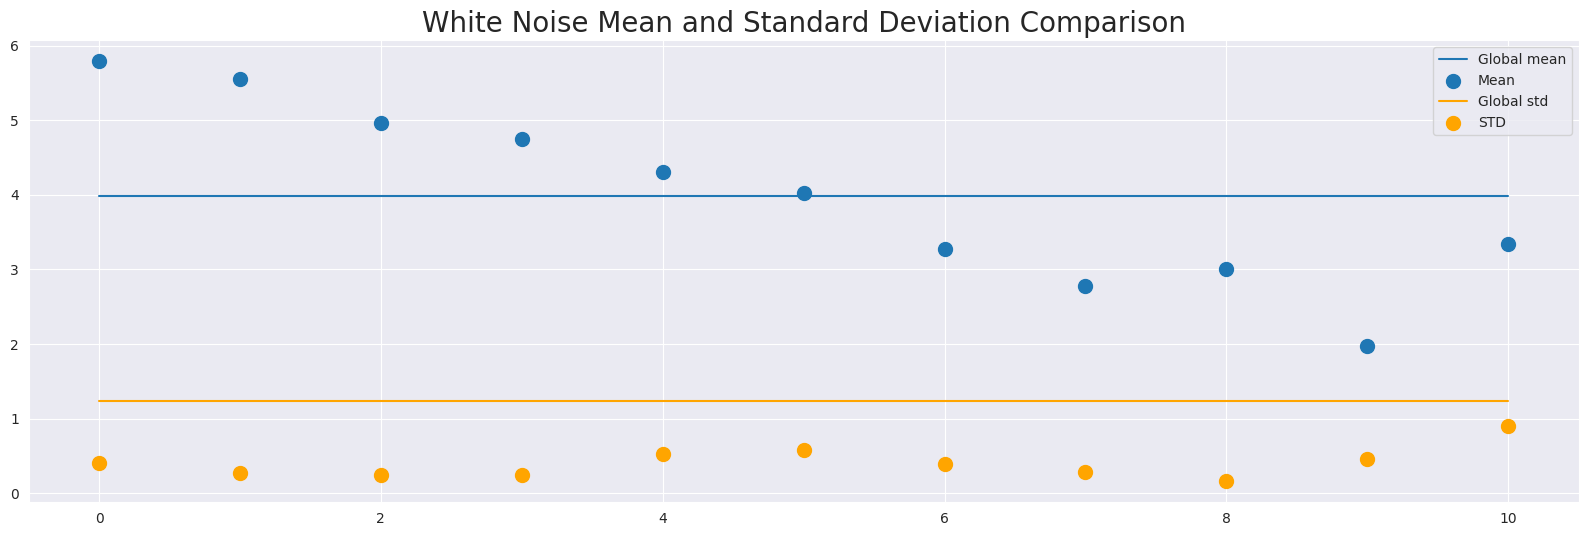

In [21]:
# comparing between means and standard deviations of time series chunks
mean_time_axis = np.arange(len(means))
std_time_axis = np.arange(len(stds))

# graph preferences
plt.rcParams["figure.figsize"] = (20,6)
plt.title('White Noise Mean and Standard Deviation Comparison', size=20)

# plotting the actual mean of time series
plt.plot(mean_time_axis, [yield_day_close.mean()] * len(means),
         label='Global mean', lw=1.5)

# plotting the chunked means
plt.scatter(mean_time_axis, y=means, label='Mean', s=100)

# plotting the actual standard deviation of time series
plt.plot(std_time_axis, [yield_day_close.std()] * len(stds),
         label='Global std', lw=1.5, color='orange')

# plotting the chunked standard deviations
plt.scatter(std_time_axis, y=stds, label='STD', color='orange', s=100)

plt.legend();

**Autocorrelation Plots**

In [22]:
from statsmodels.graphics.tsaplots import acf, plot_acf

ac_values = np.round(acf(yield_day_close['Close'],  fft=False),2)
ac_values

array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.99, 0.99, 0.99,
       0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99,
       0.99, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98,
       0.98, 0.98, 0.98, 0.97, 0.97, 0.97, 0.97])

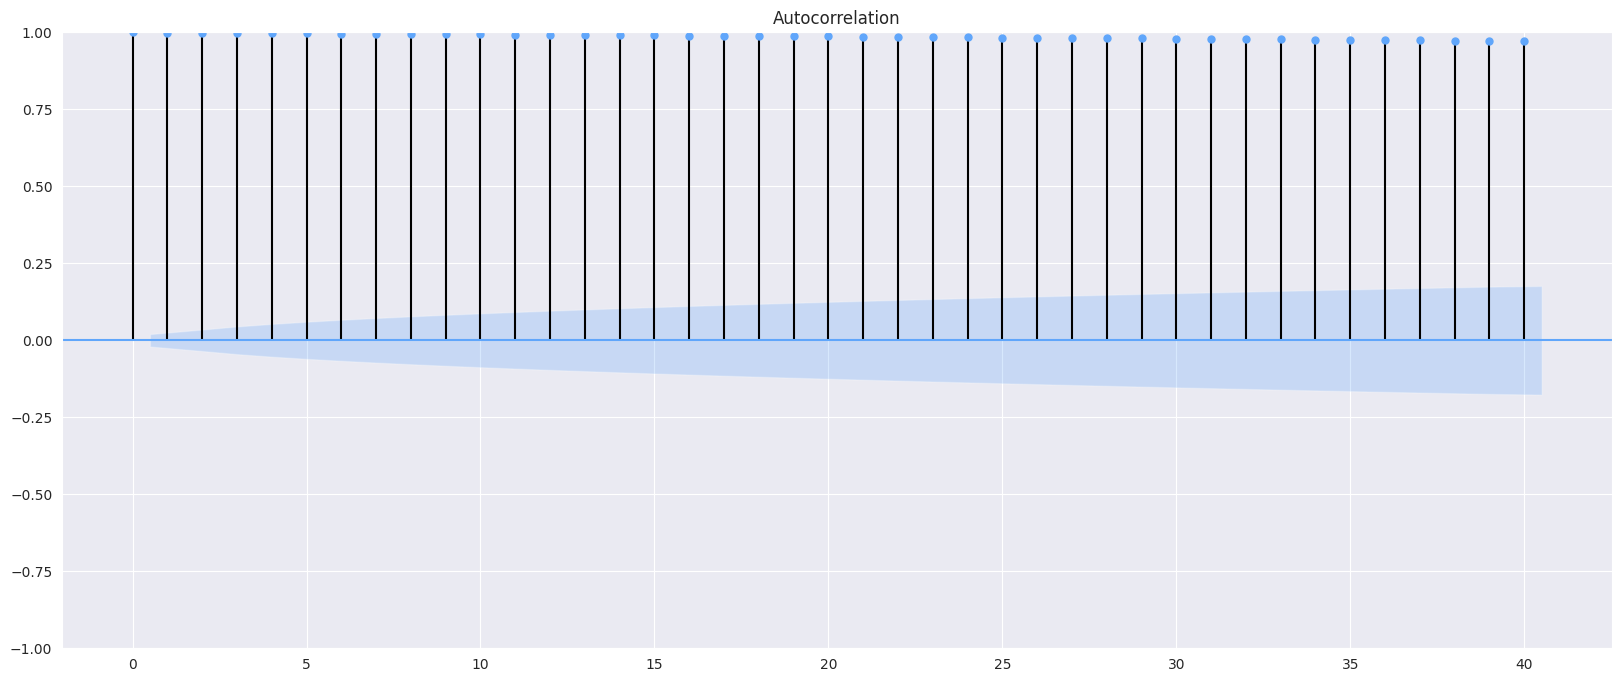

In [23]:
from matplotlib.collections import PolyCollection
fig, ax = plt.subplots(figsize=(20,8))
plot_acf(yield_day_close, ax=ax,
         color='#60A6FB',
         vlines_kwargs={"colors": '#000000'})

for item in ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor('#60A6FB')

plt.show()

In [24]:
yield_day_close['Close_Diff'] = yield_day_close['Close'].diff(periods=1)
yield_day_close = yield_day_close.dropna()

<ipython-input-24-fe7cfac9ab74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yield_day_close['Close_Diff'] = yield_day_close['Close'].diff(periods=1)


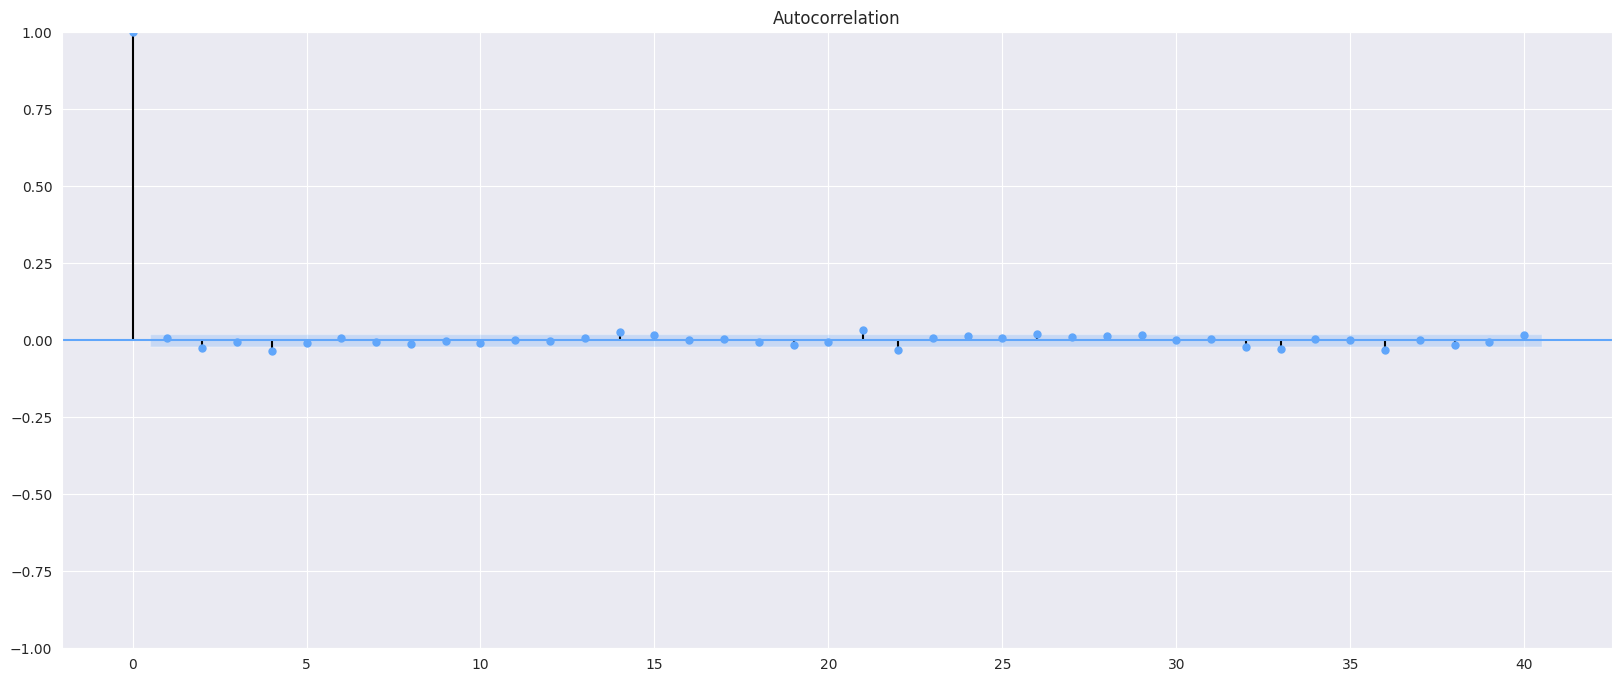

In [25]:
from matplotlib.collections import PolyCollection
fig, ax = plt.subplots(figsize=(20,8))
plot_acf(yield_day_close['Close_Diff'], ax=ax,
         color='#60A6FB',
         vlines_kwargs={"colors": '#000000'})

for item in ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor('#60A6FB')

plt.show()

In [26]:
from statsmodels.graphics.tsaplots import pacf, plot_pacf

pacf_values = pacf(yield_day_close['Close'], nlags=30)
np.round(pacf_values, 2)

array([ 1.  ,  1.  , -0.01,  0.04,  0.01,  0.03,  0.01, -0.  ,  0.01,
        0.01,  0.  ,  0.01, -0.  ,  0.  , -0.01, -0.03, -0.02, -0.  ,
       -0.01,  0.01,  0.01, -0.01, -0.03,  0.03, -0.  , -0.02, -0.01,
       -0.01, -0.01, -0.02, -0.02])

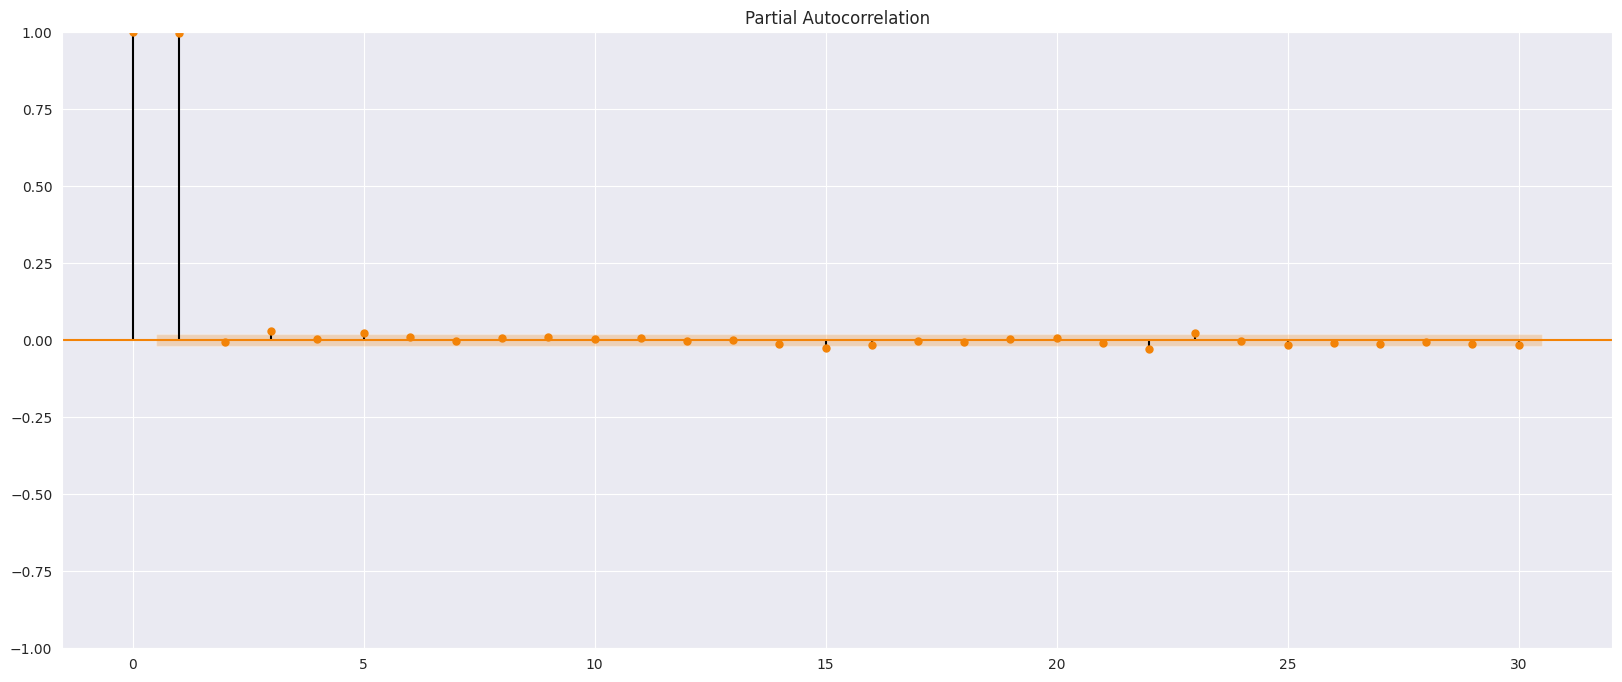

In [27]:
# Plot partial autocorrelation
fig, ax = plt.subplots(figsize=(20,8))

plot_pacf(yield_day_close['Close'],
          lags=30, ax=ax, color='#F38307',
          vlines_kwargs={"colors": '#000000'})

for item in ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor('#F38307')

plt.show()

In [28]:
pacf_values = pacf(yield_day_close['Close_Diff'], nlags=25)
np.round(pacf_values, 2)

array([ 1.  ,  0.01, -0.02, -0.01, -0.03, -0.01,  0.01, -0.01, -0.01,
       -0.  , -0.01,  0.  , -0.  ,  0.01,  0.03,  0.02,  0.  ,  0.  ,
       -0.  , -0.01, -0.  ,  0.03, -0.03,  0.01,  0.01,  0.01])

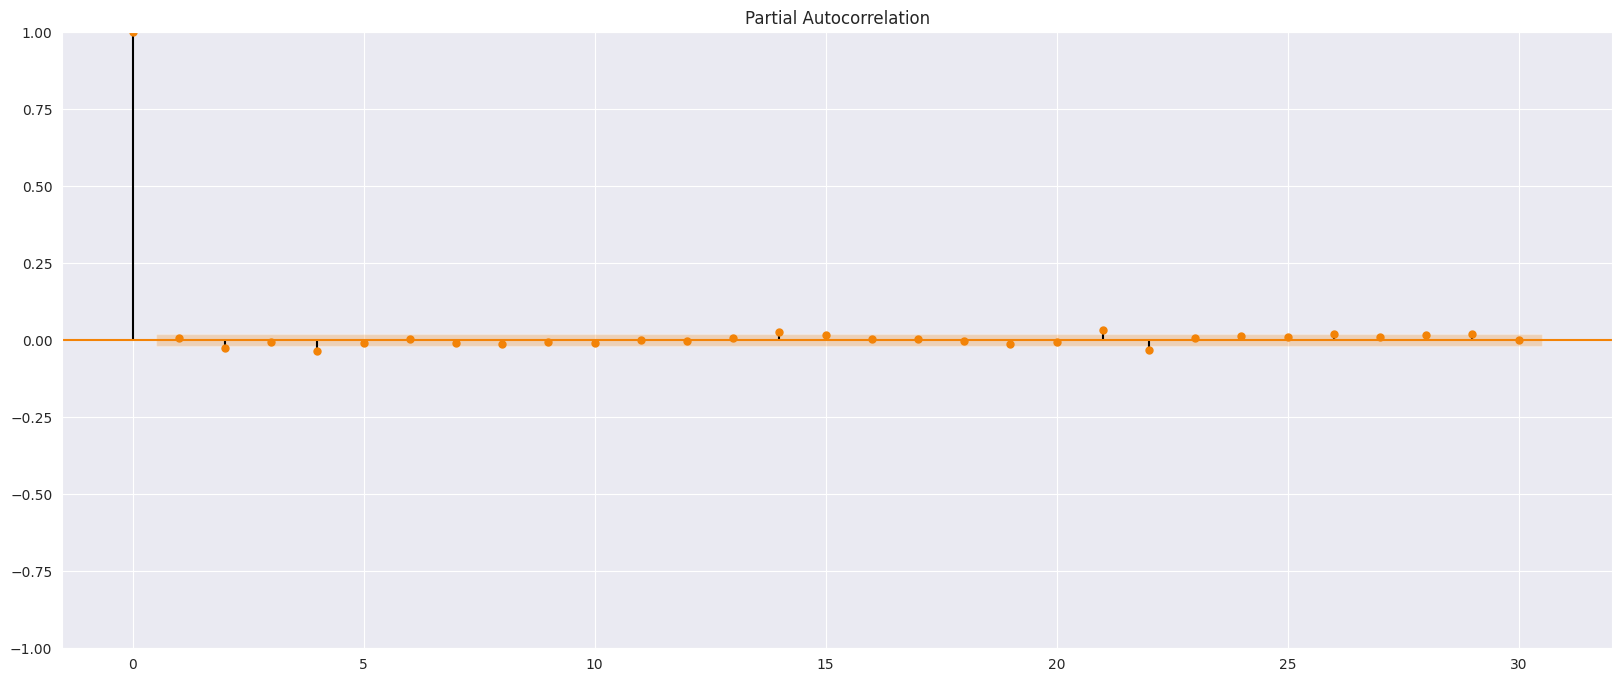

In [29]:
# Plot partial autocorrelation
fig, ax = plt.subplots(figsize=(20,8))

plot_pacf(yield_day_close['Close_Diff'],
          lags=30, ax=ax, color='#F38307',
          vlines_kwargs={"colors": '#000000'})

for item in ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor('#F38307')

plt.show()

**Augmented Dickey-Fuller Test**

In [30]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(yield_day_close['Close'])

In [31]:
print(adf)

-2.05994933682301


In [32]:
print(pvalue)

0.26092098573390765


In [33]:
print(nobs)

9455


In [34]:
print(critical_values)

{'1%': -3.431041811342728, '5%': -2.8618457375201785, '10%': -2.5669327389837635}


In [35]:
# define Dickey-Fuller Test (DFT) function
# Null is that unit root is present, rejection means likely stationary
import statsmodels.tsa.stattools as ts
def dftest(timeseries):
    dftest = ts.adfuller(timeseries,)
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.grid()
    plt.show(block=False)

Test Statistic            -2.059949
p-value                    0.260921
Lags Used                 36.000000
Observations Used       9455.000000
Critical Value (1%)       -3.431042
Critical Value (5%)       -2.861846
Critical Value (10%)      -2.566933
dtype: float64


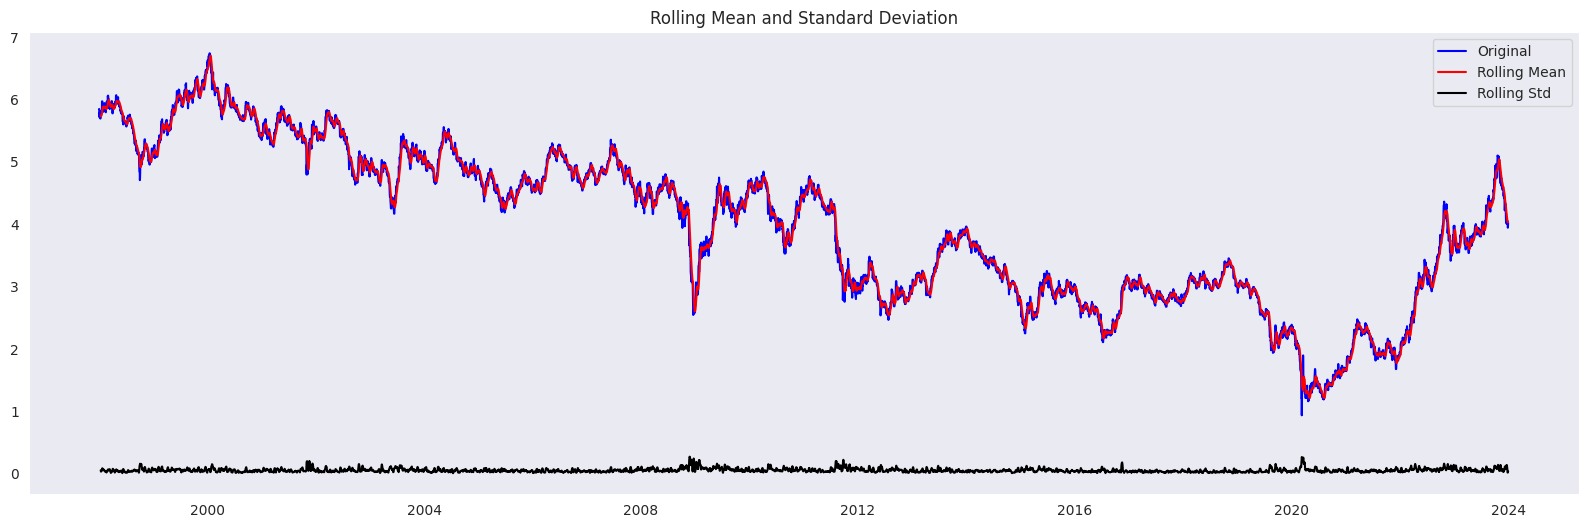

In [36]:
# run DFT on monthly
dftest(yield_day_close['Close'])
# p-value allows us to reject a unit root: data is stationary

**Smoothing Time Series**

In [37]:
%cd /content/drive/MyDrive/IA_IBM/SeriesTemporalesAnalisisSupervivencia/proyecto
!python colorsetup.py

/content/drive/MyDrive/IA_IBM/SeriesTemporalesAnalisisSupervivencia/proyecto


In [38]:
import sys, os
import statsmodels as ss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from colorsetup import colors, palette
sns.set_palette(palette)

warnings.filterwarnings("ignore")

In [39]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3);

In [40]:
#### MSE Function
### Let's create a Mean Squared Error function that we can use going forward.

def mse(observations, estimates):
    '''
    INPUT:
        observations - numpy array of values indicating observed values
        estimates - numpy array of values indicating an estimate of values
    OUTPUT:
        Mean Square Error value
    '''
    # check arg types
    assert type(observations) == type(np.array([])), "'observations' must be a numpy array"
    assert type(estimates) == type(np.array([])), "'estimates' must be a numpy array"
    # check length of arrays equal
    assert len(observations) == len(estimates), "Arrays must be of equal length"

    # calculations
    difference = observations - estimates
    sq_diff = difference ** 2
    mse = sum(sq_diff)

    return mse

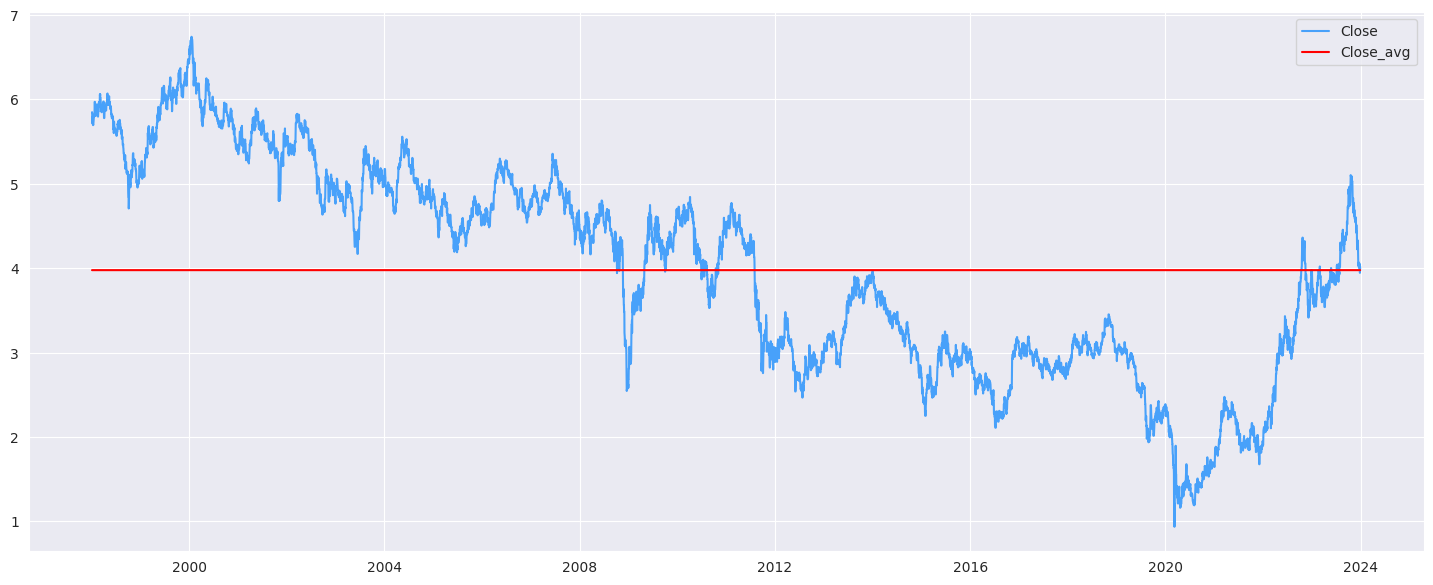

Mean Square Error: 14634.058710369087


In [41]:
# find mean of series
time_series_avg = np.mean(yield_day_close['Close'])

# create array of mean value equal to length of time array
yield_day_close['Close_avg'] = np.full(shape=len(yield_day_close), fill_value=time_series_avg, dtype='float')

fig, ax = plt.subplots(figsize=(18,7))
ax.plot(yield_day_close['Close'], c='#48A1FA')
ax.plot(yield_day_close['Close_avg'], c='red')
plt.legend(['Close', 'Close_avg'])
plt.show()

print(f"Mean Square Error: {mse(np.array(yield_day_close['Close']), np.array(yield_day_close['Close_avg']))}")

yield_day_close.drop(['Close_avg'], axis=1, inplace=True)

In [43]:
from statsmodels.tsa.stattools import adfuller
differenced_series = yield_day_close['Close'].diff().dropna()
comparison_df = pd.DataFrame({'Original': yield_day_close['Close'][1:],
                              'Shifted': yield_day_close['Close'].shift(1).dropna(),
                              'Differenced': differenced_series
})
print(comparison_df.head())

            Original  Shifted  Differenced
1998-01-04     5.848    5.848        0.000
1998-01-05     5.729    5.848       -0.119
1998-01-06     5.718    5.729       -0.011
1998-01-07     5.793    5.718        0.075
1998-01-08     5.746    5.793       -0.047


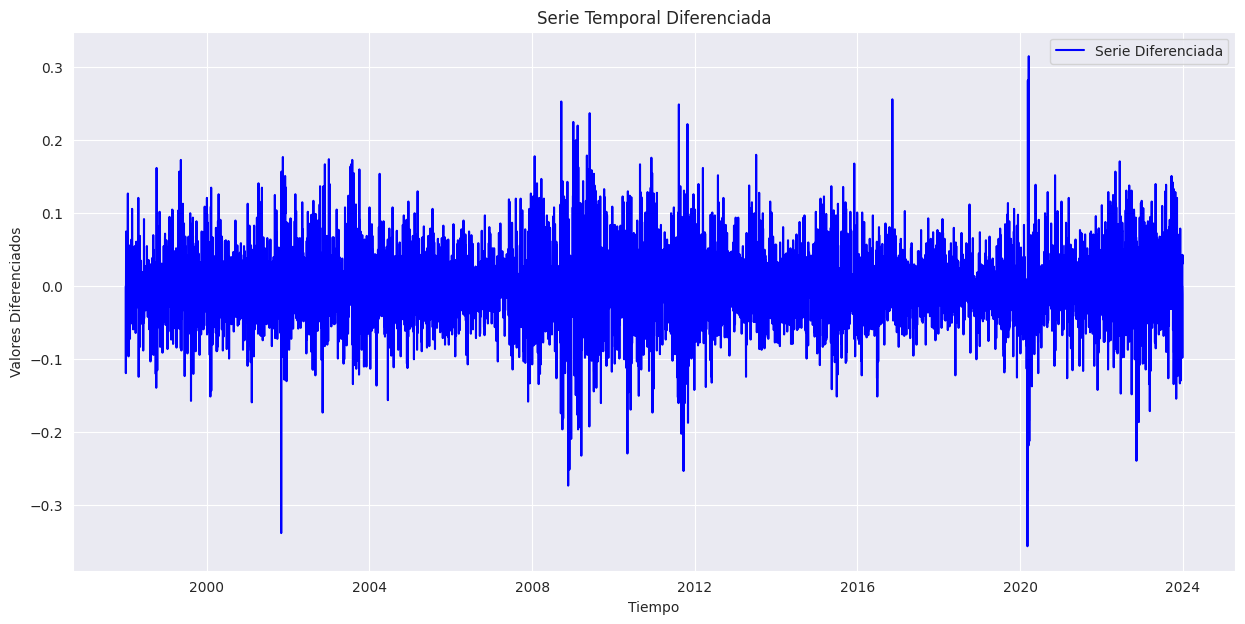

In [44]:
plt.figure(figsize=(15, 7))
plt.plot(differenced_series, color='blue', label='Serie Diferenciada')
plt.title('Serie Temporal Diferenciada')
plt.xlabel('Tiempo')
plt.ylabel('Valores Diferenciados')
plt.legend()
plt.show()

In [45]:
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(differenced_series)

# Resultados de la prueba
print("Resultados de la Prueba ADF para la Serie Diferenciada:")
print(f"Estadístico de Prueba (ADF): {adf_after}")
print(f"P-valor: {pvalue_after}")
print("Valores Críticos:")
for key, value in critical_values_.items():
    print(f"   {key}: {value}")

Resultados de la Prueba ADF para la Serie Diferenciada:
Estadístico de Prueba (ADF): -15.974022621454019
P-valor: 6.953204232032125e-29
Valores Críticos:
   1%: -3.431041811342728
   5%: -2.8618457375201785
   10%: -2.5669327389837635


In [48]:
differenced_series.head()

,Close
1998-01-04,0.000
1998-01-05,-0.119
1998-01-06,-0.011
1998-01-07,0.075
1998-01-08,-0.047


In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Configuración de parámetros SARIMA (ejemplo)
p, d, q = 1, 1, 1  # ARIMA(p, d, q)
P, D, Q, s = 1, 0, 1, 12  # SARIMA(P, D, Q, s)

# Modelo SARIMA
model = SARIMAX(differenced_series, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit(disp=False)

# Predicciones
predictions = model_fit.forecast(steps=10)  # Predicciones en la escala diferenciada
print(predictions)

2023-12-30    0.000315
2023-12-31    0.000463
2024-01-01    0.000463
2024-01-02    0.000209
2024-01-03    0.000257
2024-01-04    0.000329
2024-01-05    0.000317
2024-01-06    0.000293
2024-01-07    0.000330
2024-01-08    0.000693
Freq: D, Name: predicted_mean, dtype: float64


In [50]:
# Reconstruir las predicciones en la escala original
last_observed_value = yield_day_close['Close'].iloc[-1]  # Último valor conocido
reconstructed_predictions = predictions.cumsum() + last_observed_value

print(reconstructed_predictions)

2023-12-30    4.019315
2023-12-31    4.019778
2024-01-01    4.020242
2024-01-02    4.020451
2024-01-03    4.020707
2024-01-04    4.021036
2024-01-05    4.021353
2024-01-06    4.021646
2024-01-07    4.021976
2024-01-08    4.022670
Freq: D, Name: predicted_mean, dtype: float64


In [53]:
print(f"Longitud de fechas: {len(yield_day_close.index[-len(reconstructed_predictions):])}")
print(f"Longitud de valores originales: {len(yield_day_close['Close'].iloc[-len(reconstructed_predictions):])}")
print(f"Longitud de predicciones reconstruidas: {len(reconstructed_predictions)}")

Longitud de fechas: 10
Longitud de valores originales: 10
Longitud de predicciones reconstruidas: 10


In [56]:
num_predictions = len(reconstructed_predictions)

dates = yield_day_close.index[-num_predictions:]  # Últimas fechas que corresponden a las predicciones
originals = yield_day_close['Close'].iloc[-num_predictions:]  # Últimos valores reales

# Verificar que las longitudes coinciden
print(f"Longitud del índice de fechas: {len(dates)}")
print(f"Longitud de los valores originales: {len(originals)}")
print(f"Longitud de las predicciones reconstruidas: {len(reconstructed_predictions)}")

Longitud del índice de fechas: 10
Longitud de los valores originales: 10
Longitud de las predicciones reconstruidas: 10
